# Reproduction of all DTW-SOM plots

In [1]:
import os
import sys
import numpy as np
import pickle
import matplotlib.pyplot as plt
from dtaidistance import dtw_ndim

FILE_DIR = os.getcwd()
ROOT_DIR = os.path.abspath(os.path.join(FILE_DIR, os.pardir))
sys.path.insert(0, os.path.join(ROOT_DIR, "src"))

## 1. Single Driver

In [2]:
freq_per_second = 5
output_name="D2_driver"
output_folder = os.path.join(ROOT_DIR, "outputs", output_name)
dtwsom_model = pickle.load(open(os.path.join(output_folder, "dtwsom_model.p"), "rb"))

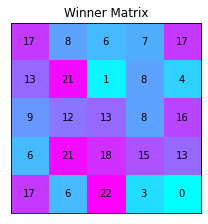

In [3]:
(fig, ax) = plt.subplots(figsize=(3.5,3.5))
winner_matrix = [[0] * dtwsom_model._cols for i in range(dtwsom_model._rows)]
for i in range(dtwsom_model._rows):
    for j in range(dtwsom_model._cols):
        neuron_index = i * dtwsom_model._cols + j
        winner_matrix[i][j] = dtwsom_model._award[neuron_index]
        ax.text(i, j, str(winner_matrix[i][j]), va='center', ha='center')
ax.imshow(np.array(winner_matrix).T, cmap=plt.get_cmap('cool'), interpolation='none')
ax.grid(True)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title("Winner Matrix")
plt.show()

In [4]:
dtwsom_window_size = int(round(freq_per_second / 2))
distance_matrix = [[0.0] * dtwsom_model._cols for i in range(dtwsom_model._rows)]
for i in range(dtwsom_model._rows):
    for j in range(dtwsom_model._cols):
        neuron_index = i * dtwsom_model._cols + j
        for neighbor_index in dtwsom_model._neighbors[neuron_index]:
            distance_matrix[i][j] += dtw_ndim.distance(
                dtwsom_model._weights[neuron_index],
                dtwsom_model._weights[neighbor_index],
                window=dtwsom_window_size,
            )
        distance_matrix[i][j] /= len(dtwsom_model._neighbors[neuron_index])

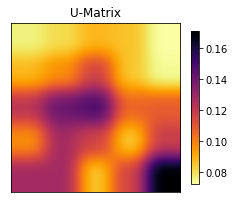

In [5]:
(fig, ax) = plt.subplots(figsize=(3.8,3.5))
plt.imshow(
    np.array(distance_matrix).T, cmap=plt.get_cmap("inferno_r"), interpolation="kaiser"
)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title("U-Matrix")
plt.colorbar(shrink=0.8)
plt.show()

## 2. All Drivers

In [6]:
freq_per_second = 5
output_name="all_drivers"
output_folder = os.path.join(ROOT_DIR, "outputs", output_name)
dtwsom_model = pickle.load(open(os.path.join(output_folder, "dtwsom_model.p"), "rb"))

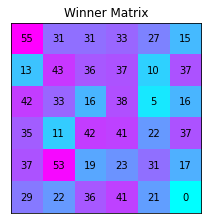

In [7]:
(fig, ax) = plt.subplots(figsize=(3.5,3.5))
winner_matrix = [[0] * dtwsom_model._cols for i in range(dtwsom_model._rows)]
for i in range(dtwsom_model._rows):
    for j in range(dtwsom_model._cols):
        neuron_index = i * dtwsom_model._cols + j
        winner_matrix[i][j] = dtwsom_model._award[neuron_index]
        ax.text(i, j, str(winner_matrix[i][j]), va='center', ha='center')
ax.imshow(np.array(winner_matrix).T, cmap=plt.get_cmap('cool'), interpolation='none')
ax.grid(True)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title("Winner Matrix")
plt.show()

In [8]:
dtwsom_window_size = int(round(freq_per_second / 2))
distance_matrix = [[0.0] * dtwsom_model._cols for i in range(dtwsom_model._rows)]
for i in range(dtwsom_model._rows):
    for j in range(dtwsom_model._cols):
        neuron_index = i * dtwsom_model._cols + j
        for neighbor_index in dtwsom_model._neighbors[neuron_index]:
            distance_matrix[i][j] += dtw_ndim.distance(
                dtwsom_model._weights[neuron_index],
                dtwsom_model._weights[neighbor_index],
                window=dtwsom_window_size,
            )
        distance_matrix[i][j] /= len(dtwsom_model._neighbors[neuron_index])

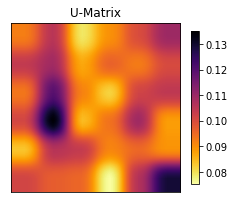

In [9]:
(fig, ax) = plt.subplots(figsize=(3.8,3.5))
plt.imshow(
    np.array(distance_matrix).T, cmap=plt.get_cmap("inferno_r"), interpolation="kaiser"
)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title("U-Matrix")
plt.colorbar(shrink=0.8)
plt.show()